In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Cargamos nuestro DataFrame
df = pd.read_csv(r'C:\Users\oswal\Documents\Documentos\Lic. Ciencia de Datos\5° Semestre\Herramientas para grandes volumenes de datos\SARS-COV2\CDMX.csv',
                    header=0,
                    parse_dates=['FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF'])

In [ ]:
#Seleccionamos las columnas con las que vamos a trabajar para disminuir el calculo 
df = df[['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'TIPO_PACIENTE', 'FECHA_INGRESO',
         'FECHA_SINTOMAS', 'FECHA_DEF', 'EDAD', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 
         'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL', 'UCI']]

In [ ]:
#Mostramos el DataFrame
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

# Tasa de mortalidad en la Ciudad de México. 

La tasa de mortalidad es un filtro aplicado a la columna CLASIFICACION_FINAL, identificando unicamente a los pacientes que tiene como resultado en su prueba NEGATIVO A SARS-COV-2

Text(0.5, 1.0, 'Tasa de Muertes en la Ciudad de México por Covid-19')

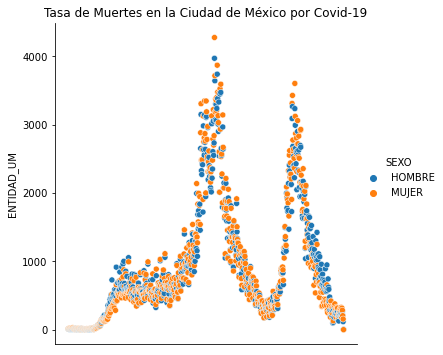

In [ ]:
#Filtro de la columna [' '] para los valores (' ')
full = df[(df['CLASIFICACION_FINAL'] != ('NEGATIVO A SARS-COV-2'))]
#Agrupamos por Fechas de Sintomas y Sexo
plot = full.groupby(["FECHA_SINTOMAS", 'SEXO']).count()
#Graficamos utilizando nuestra agrupacion anterior lo siguente
sns.relplot(data=plot, x='FECHA_SINTOMAS', y='ENTIDAD_UM', hue='SEXO')
#Agregamos la funcion a la variable ax
ax = plt.gca()
#Indicamos si las etiquetas de los ejes x y y son visibles
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(True)
#Ponemos un titulo a nuestro data frame
plt.title('Tasa de Muertes en la Ciudad de México por Covid-19')

Text(0.5, 1.0, 'Tasa de Muertes en la Ciudad de México por Covid-19 antes de la vacunación')

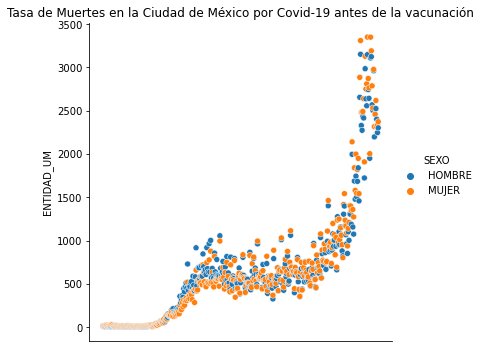

In [ ]:
antes_vacuna = df[(df['FECHA_SINTOMAS'] <= ('2020-12-24')) & (df['CLASIFICACION_FINAL'] != ('NEGATIVO A SARS-COV-2'))]
plot1 = antes_vacuna.groupby(["FECHA_SINTOMAS", 'SEXO']).count()
sns.relplot(data=plot1, x='FECHA_SINTOMAS', y='ENTIDAD_UM', hue='SEXO')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(True)
plt.title('Tasa de Muertes en la Ciudad de México por Covid-19 antes de la vacunación')

Text(0.5, 1.0, 'Tasa de Muertes en la Ciudad de México por Covid-19 despues de la vacunación')

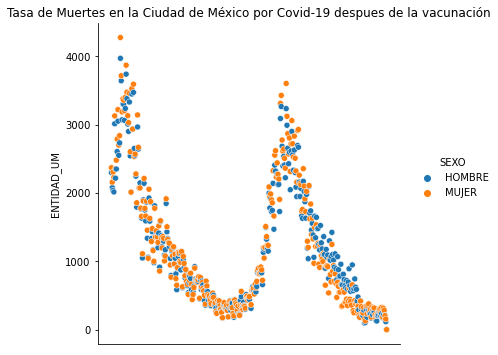

In [ ]:
antes_vacuna = df[(df['FECHA_SINTOMAS'] >= ('2020-12-24')) & (df['CLASIFICACION_FINAL'] != ('NEGATIVO A SARS-COV-2'))]
plot2 = antes_vacuna.groupby(["FECHA_SINTOMAS", 'SEXO']).count()
sns.relplot(data=plot2, x='FECHA_SINTOMAS', y='ENTIDAD_UM', hue='SEXO')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(True)
plt.title('Tasa de Muertes en la Ciudad de México por Covid-19 despues de la vacunación')